In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df_train = pd.read_csv('train.csv')
print(f"Train:\n{df_train.shape}\n")

Train:
(1460, 81)



In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.drop(["Id"], axis=1, inplace=True)

numerical features

In [7]:
df_numer = df_train.select_dtypes(exclude=["object"])
df_numer.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

drop quasi-constant features

In [8]:
warnings.filterwarnings("ignore")
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(df_numer.iloc[:,:-1])
quasicon_list = [col for col in df_numer.iloc[:, :-1].columns if col not in df_numer.iloc[:, :-1].columns[selector.get_support()]]
print(f"\nQuasi-constant features: {quasicon_list}")
df_numer.drop(quasicon_list, axis=1, inplace=True)


Quasi-constant features: ['KitchenAbvGr']


correlation

<AxesSubplot:>

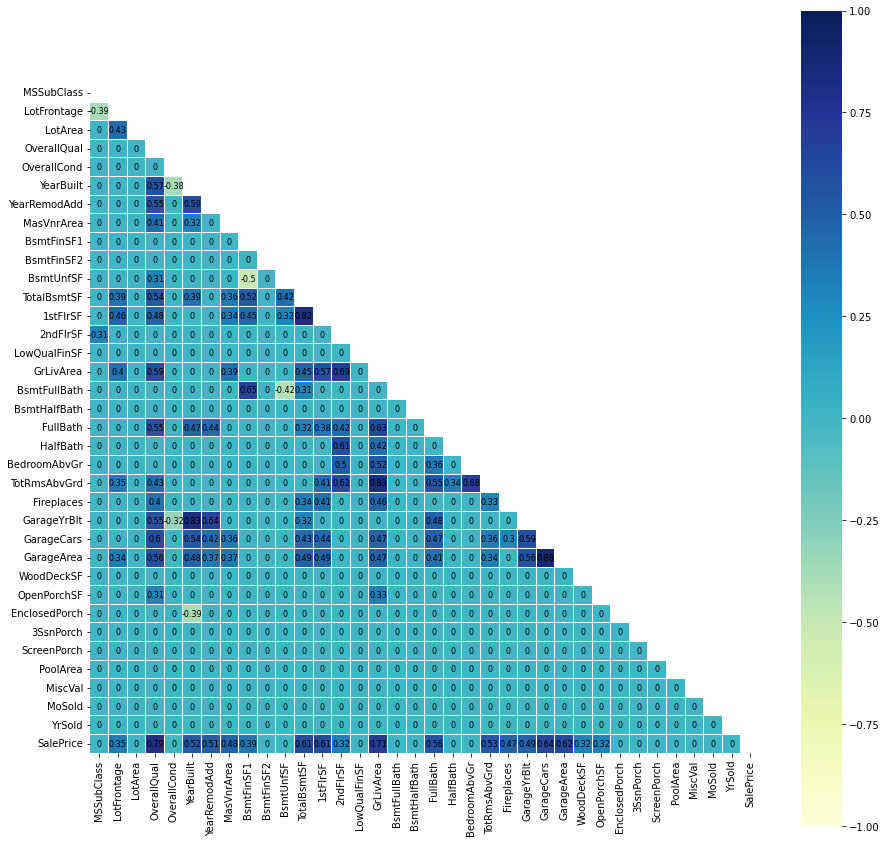

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = df_numer.corr()
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0,mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), linewidths=0.1,cmap="YlGnBu",annot_kws={"size": 8, "color": "black"},ax=ax, square=True, annot=True)

In [10]:
df_corr = df_numer.corr()["SalePrice"][:-1]
highly_corr = df_corr[abs(df_corr) >= 0.3].sort_values(ascending=False)
print(f"correlated values with SalePrice:\n{highly_corr}\n")

correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64



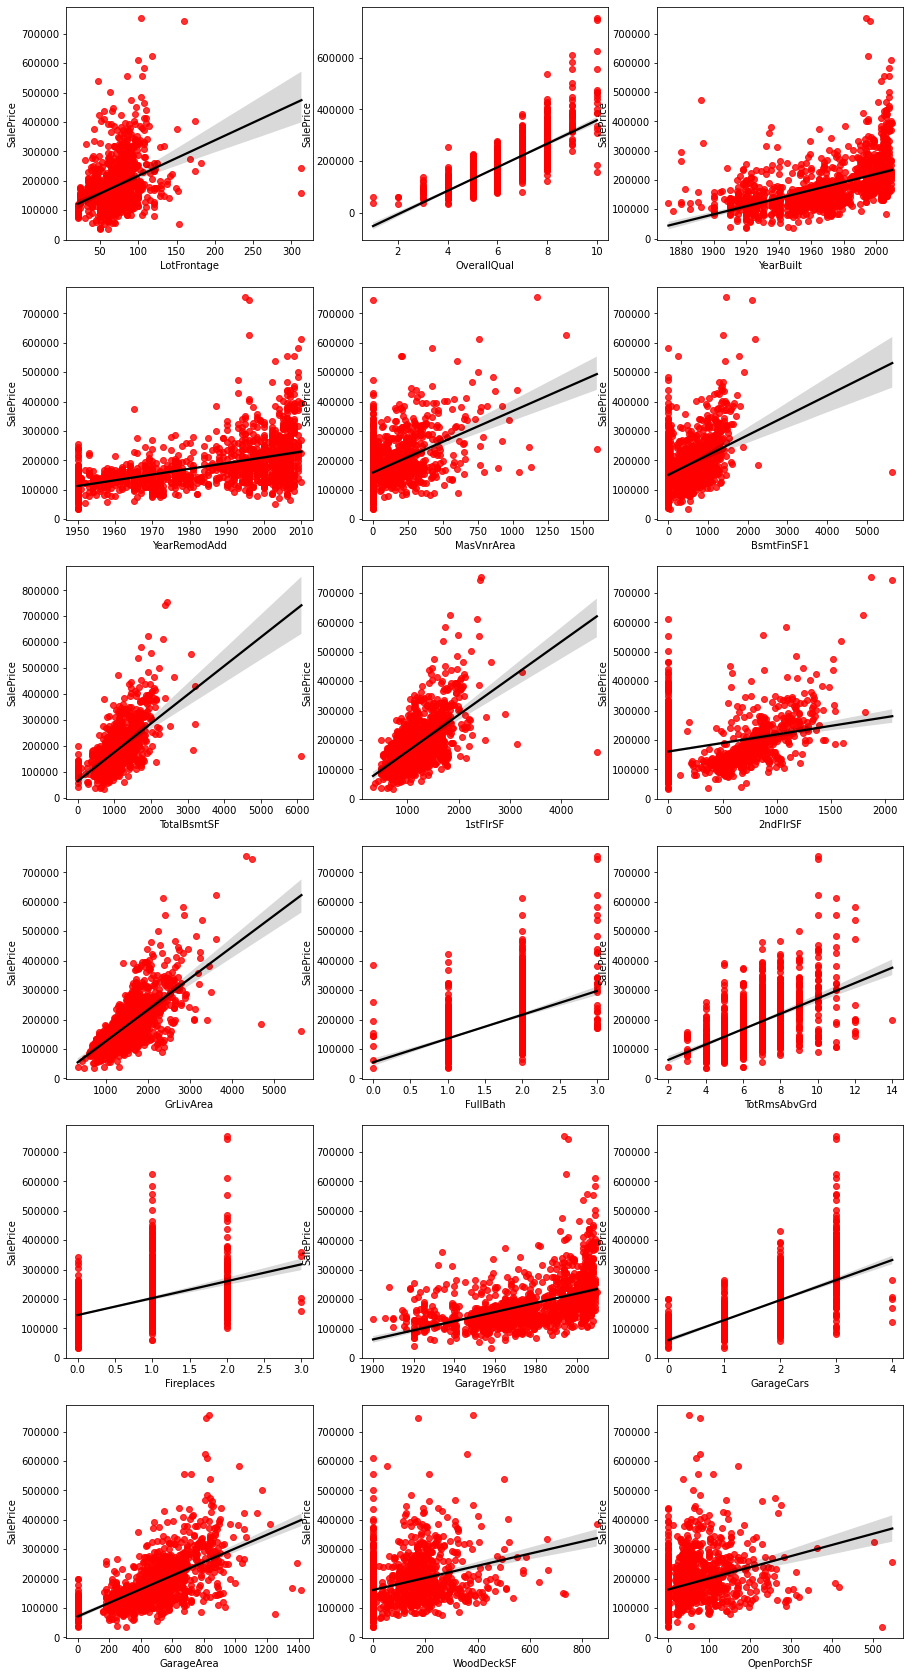

In [11]:
corr_list = df_corr[abs(df_corr) >= 0.3].index.tolist()
corr_list.append("SalePrice")
df_strong = df_numer.loc[:, corr_list]


fig, ax = plt.subplots(round(len(corr_list) / 3), 3,figsize=(15,30))
for i, ax in enumerate(fig.axes):
    if i < len(corr_list)-1:
        sns.regplot(x=corr_list[i], y="SalePrice",ax=ax, data=df_strong, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [12]:
corr_list[:-1]

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

imputation

In [13]:
df_numer.drop(["WoodDeckSF", "OpenPorchSF", "2ndFlrSF","BsmtFinSF1","YearBuilt","YearRemodAdd"], axis=1, inplace=True)
#drop outliers, refers to regplot

In [14]:
outliers1 = df_numer[(df_numer["GrLivArea"] > 4000) & (df_numer["SalePrice"] <= 200000)].index.tolist()

outliers2 = df_numer[(df_numer["TotalBsmtSF"] > 3000) & (df_numer["SalePrice"] <= 400000)].index.tolist()

outliers3 = df_numer[(df_numer["GarageArea"] > 1200) & (df_numer["SalePrice"] <= 300000)].index.tolist()

outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)
df_numer = df_numer.drop(df_numer.index[outliers])

[1061, 581, 1190, 523, 332, 1298]


In [15]:
column_with_nan = df_numer.columns[df_numer.isnull().any()]
column_with_nan

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [16]:
theimput = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(theimput.fit_transform(df_numer))
df_imputed.columns = df_numer.columns

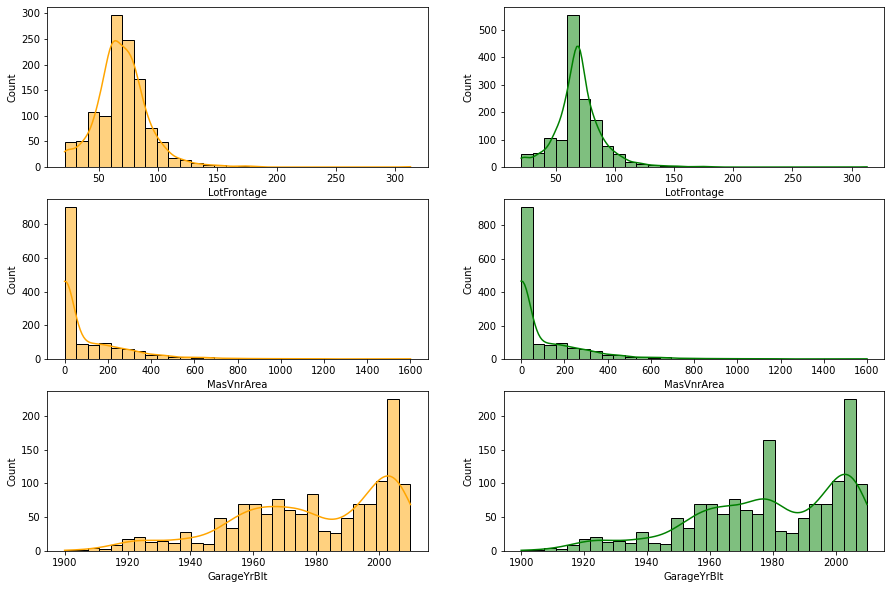

In [17]:
listnan = column_with_nan.tolist()
fig, axes = plt.subplots(len(listnan), 2,figsize=(15,10))
# Plot the results
for feature, fig_pos in zip(listnan,[i for i in range(0, len(listnan))]) :
    # before imputation
    bi = sns.histplot(ax=axes[fig_pos, 0], x=df_numer[feature],kde=True, bins=30, color="orange", edgecolor="black")

    # after imputation
    ai = sns.histplot(ax=axes[fig_pos, 1], x=df_imputed[feature],kde=True, bins=30, color="green", edgecolor="black")

In [18]:
df_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
#we keep only MasVnrArea because it doesn't change when imputed

Categorical features

In [19]:
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")
df_categ = df_train[categorical_features]

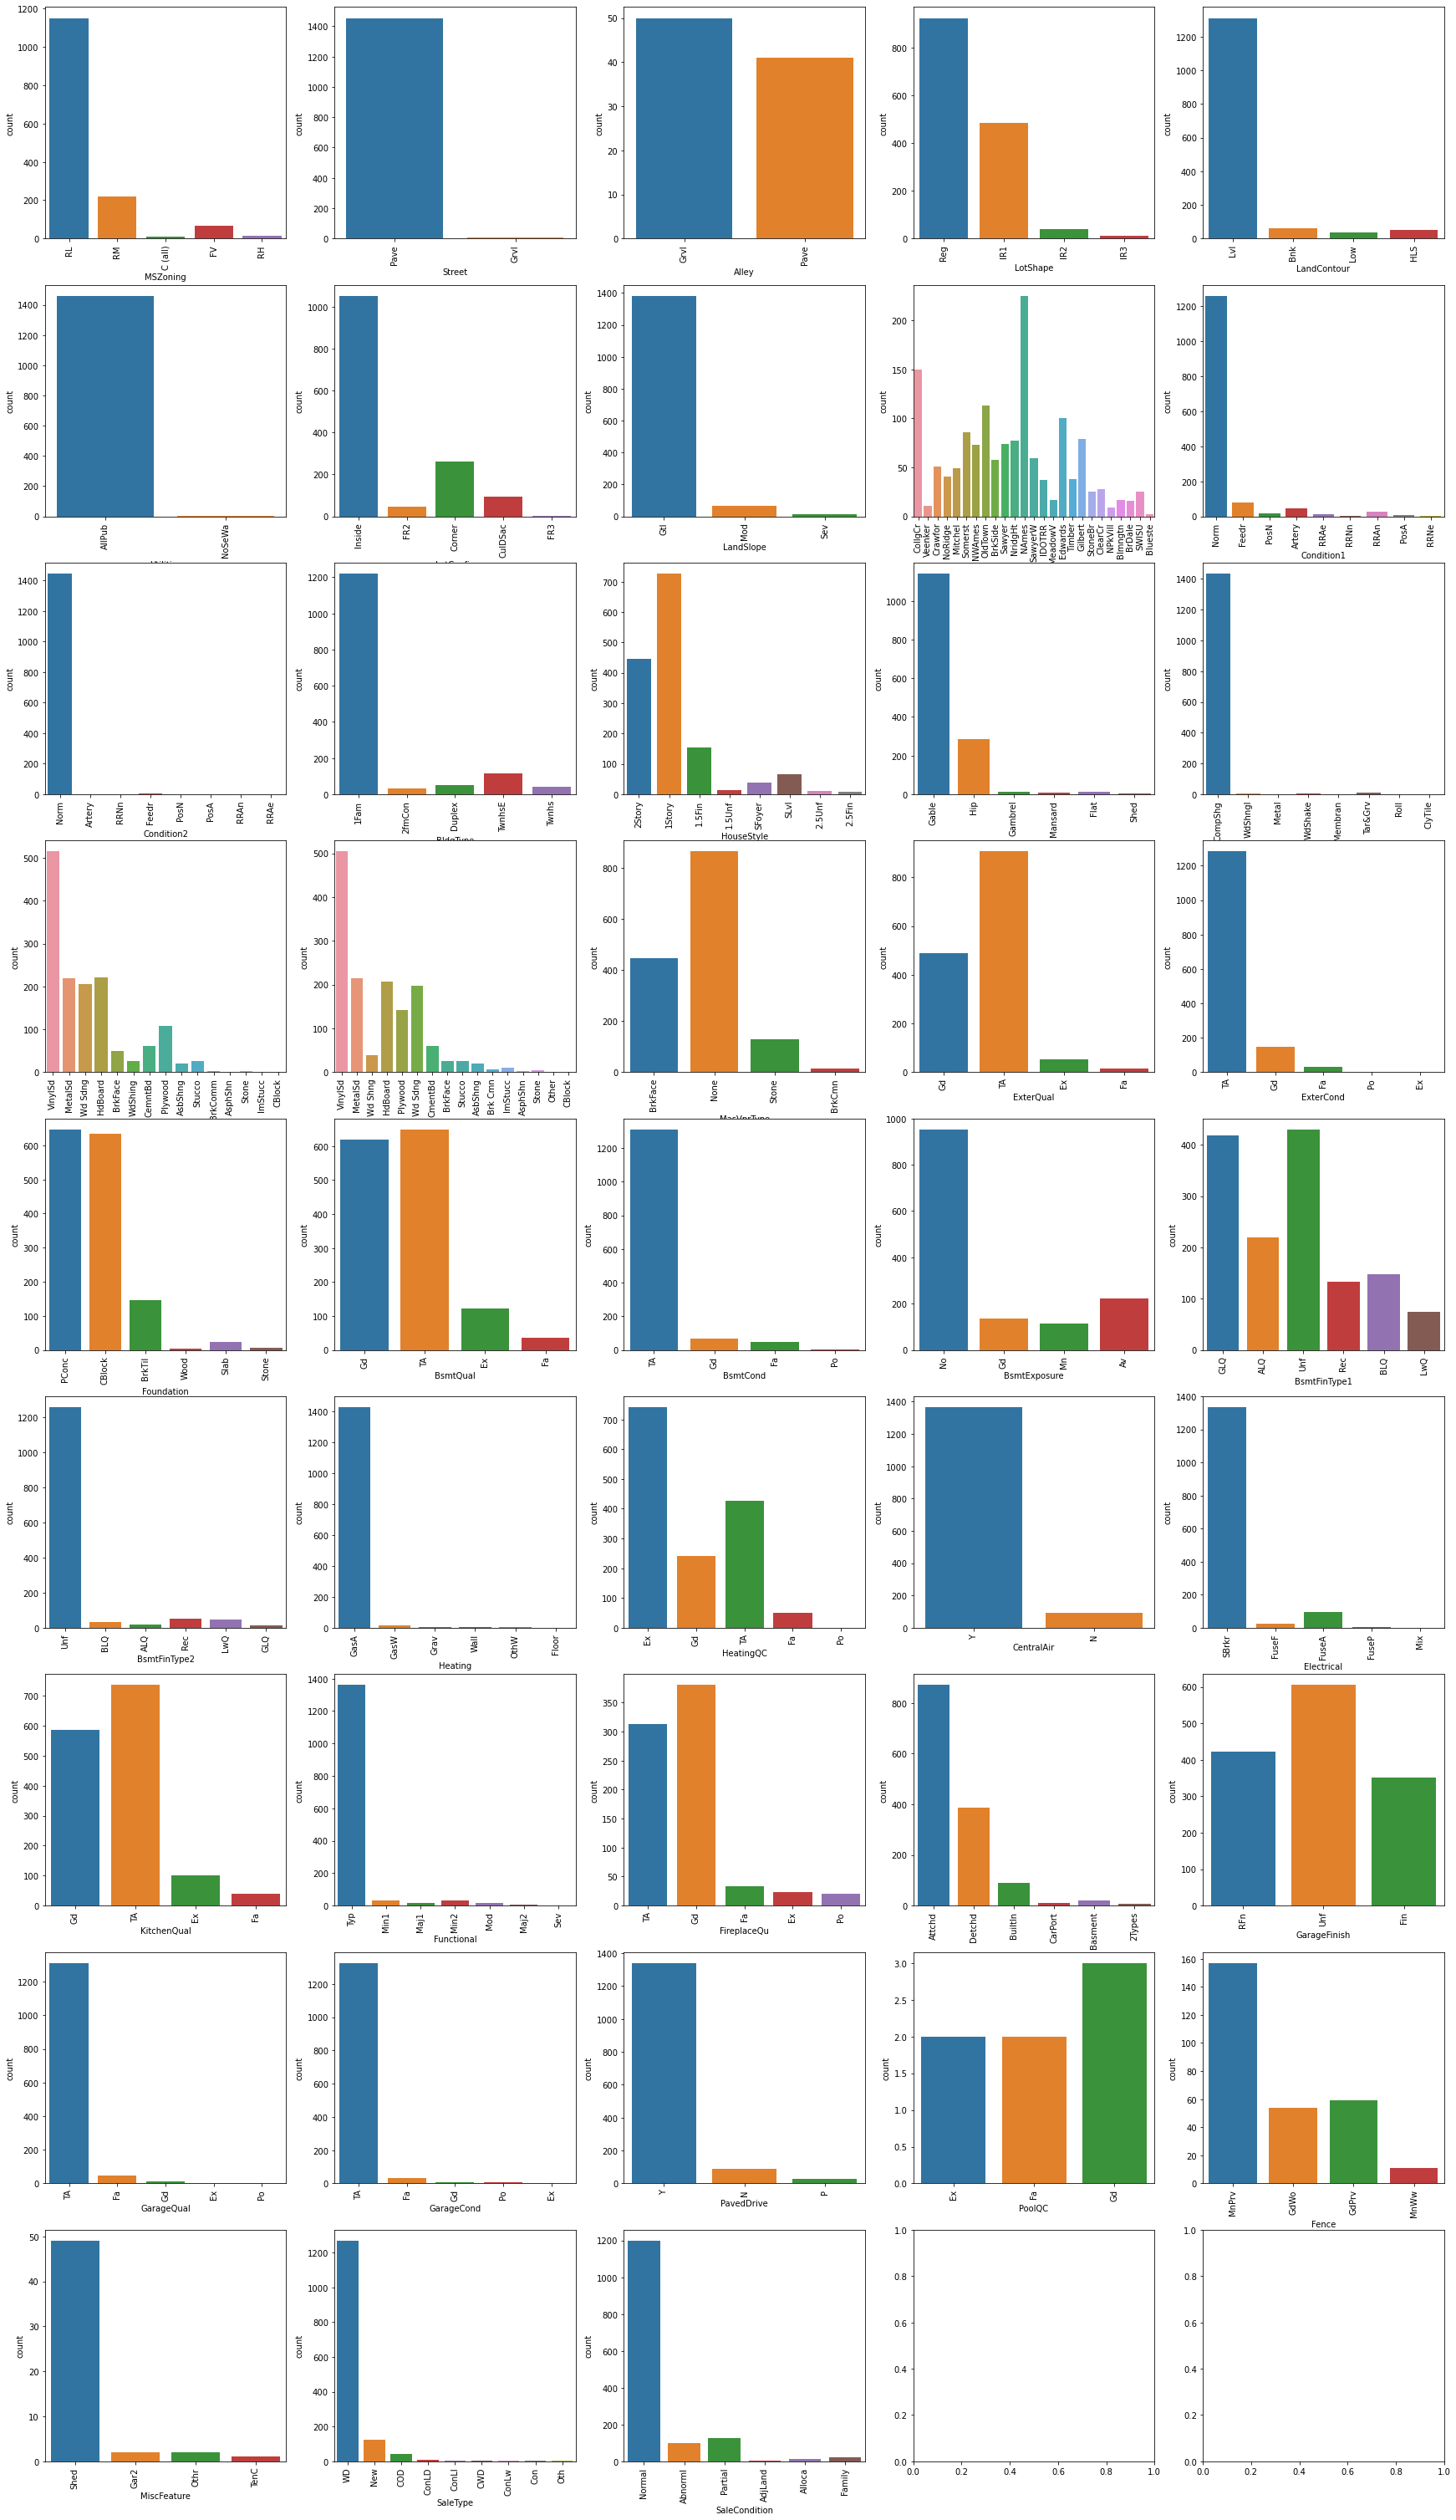

In [20]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 5), 5, figsize=(30, 54))
for i, ax in enumerate(fig.axes):
    if i < len(df_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=90)
        sns.countplot(x=df_categ.columns[i], data=df_categ, ax=ax)

In [21]:
#Drop non-informative features
df_categ.drop([
    "Street",
    "Alley",
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "CentralAir",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "PavedDrive",
    "LandContour",
    "ExterCond",
    "GarageCond",
    "Heating",
    "MiscFeature",
    "BsmtFinType2",
    "Functional",
    "GarageQual",
    "GarageCond",
], axis=1, inplace=True)

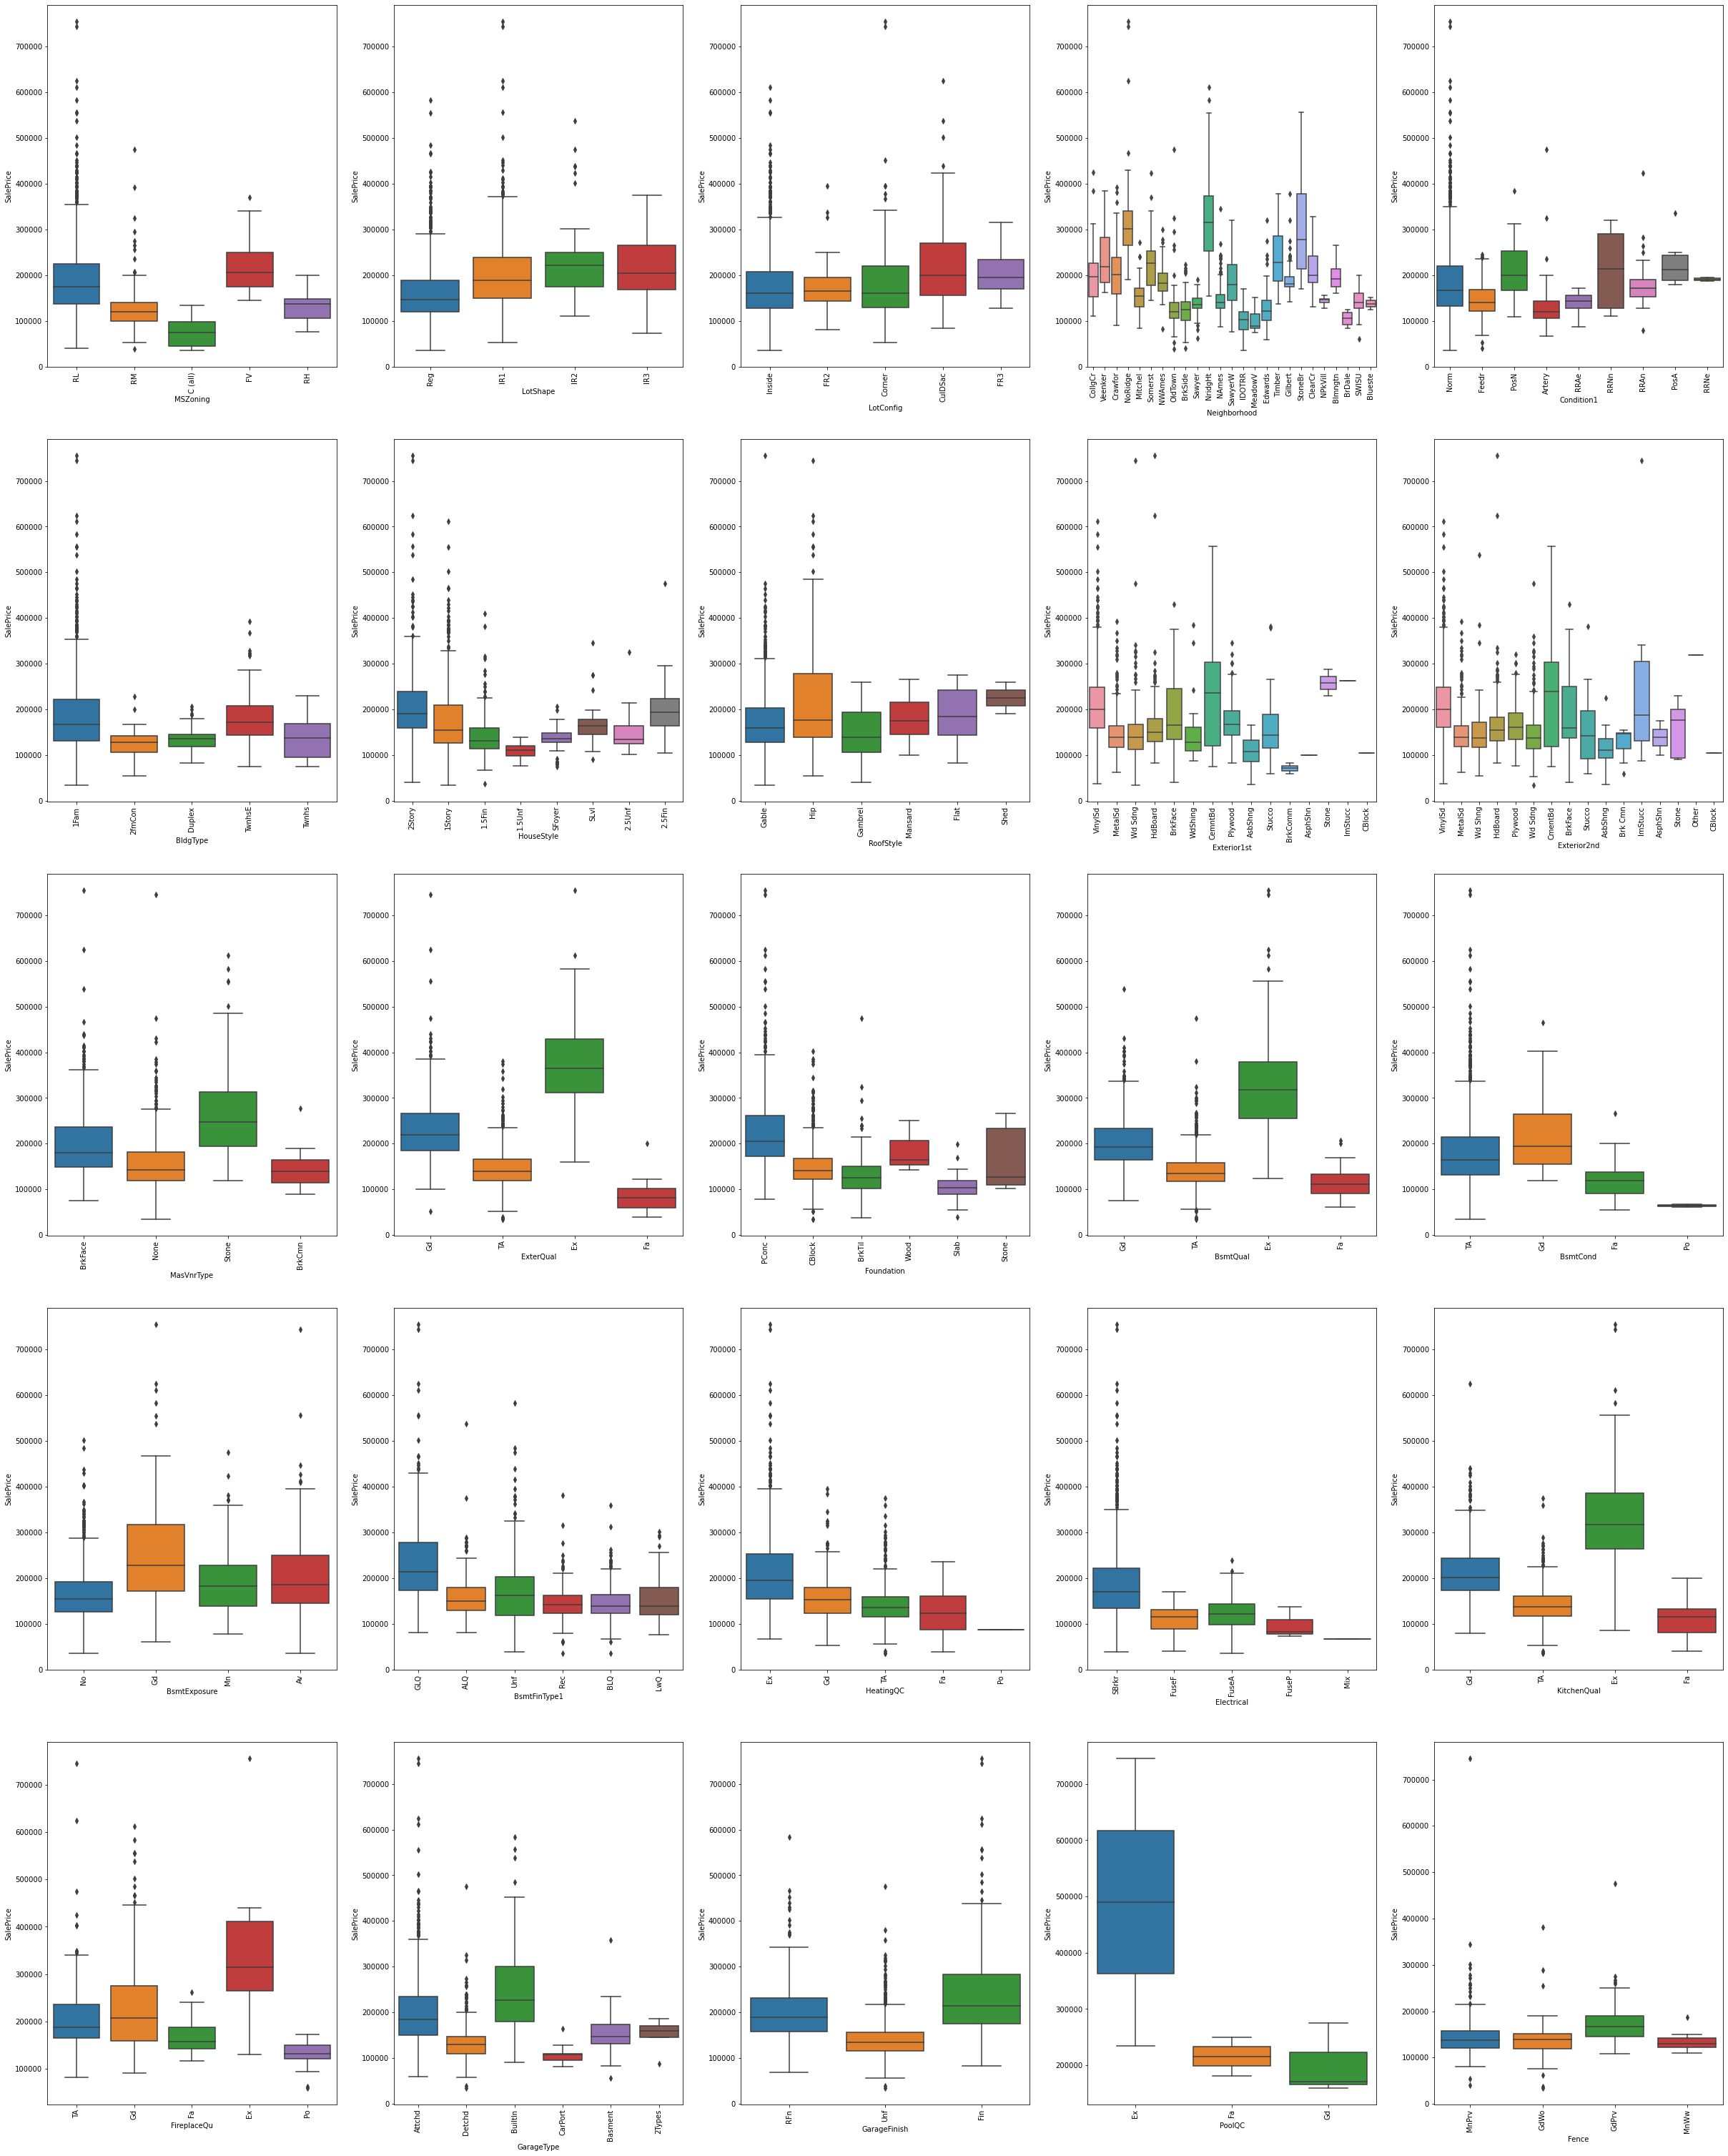

In [22]:
fig, axes = plt.subplots(round(len(df_categ.columns) / 5), 5, figsize=(42, 54))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.boxplot(x=df_categ.columns[i], y="SalePrice", data=df_categ, ax=ax)

drop nan from categorical features

In [23]:
column_with_nan = df_categ.columns[df_categ.isnull().any()]
droplist = []
for i in column_with_nan:
    percentnan = round(df_categ[i].isnull().sum() * 100 / len(df_categ), 2)
    if percentnan > 5:
        print(f"Features:{i}")
        print(f"percent of nan:{percentnan}")
        droplist.append(i)
df_categ.drop(droplist, axis=1, inplace=True,)

Features:FireplaceQu
percent of nan:47.26
Features:GarageType
percent of nan:5.55
Features:GarageFinish
percent of nan:5.55
Features:PoolQC
percent of nan:99.52
Features:Fence
percent of nan:80.75


In [24]:
column_with_nan = df_categ.columns[df_categ.isnull().any()]
column_with_nan


Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Electrical'],
      dtype='object')

In [25]:
df_categ.drop(["Exterior2nd","MasVnrType"], axis=1, inplace=True)
#codependant

In [26]:
categ_fill_null = {"BsmtQual": df_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_categ["BsmtFinType1"].mode().iloc[0],
                   "Electrical": df_categ["Electrical"].mode().iloc[0],
                   "BsmtCond": df_categ["BsmtCond"].mode().iloc[0],
                   "BsmtExposure": df_categ["BsmtExposure"].mode().iloc[0]}
df_categ = df_categ.fillna(value=categ_fill_null)

In [27]:
for i in df_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_categ[i], prefix=i)
    df_categ = df_categ.join(df_dummies)

df_binary = df_categ.iloc[:, 20:]
df_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
df_train_new = df_imputed.join(df_binary)
print(f"Train set: {df_train_new.shape}")

Train set: (1454, 158)


log transformation to the target

Text(0, 0.5, 'count')

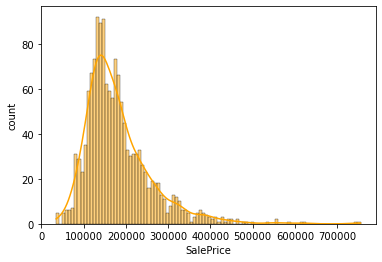

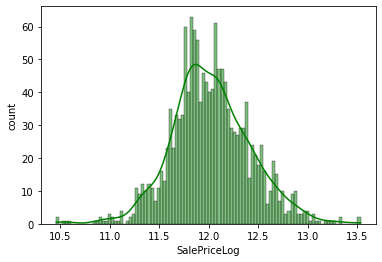

In [29]:
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)
fig, axes = plt.subplots()
# before log transformation
p = sns.histplot(ax=axes, x=df_train_new["SalePrice"], kde=True, bins=100, color="orange")
p.set_xlabel("SalePrice")
p.set_ylabel("count")

fig, axes = plt.subplots()
# before log transformation
p = sns.histplot(ax=axes, x=df_train_new["SalePriceLog"], kde=True, bins=100, color="green")
p.set_xlabel("SalePriceLog")
p.set_ylabel("count")

In [30]:
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

In [31]:
X = df_train_new.copy()
X.drop(["SalePriceLog"], axis=1, inplace=True)
print(X.shape)
Y = df_train_new.copy().loc[:, "SalePriceLog"]
print(Y.shape)

(1454, 157)
(1454,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 157)
y_train:(1163,)

X_test:(291, 157)
y_test:(291,)


In [33]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(std_scale.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(std_scale.transform(X_test), columns=X.columns)

y_train,y_test = pd.DataFrame(y_train),pd.DataFrame(y_test)
y_train,y_test = y_train.reset_index().drop("index", axis=1),y_test.reset_index().drop("index", axis=1)


backward regression to eliminate unnecessary features

In [34]:
Selected_Features = []
import statsmodels.api as sm
import statsmodels.formula.api as smf


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : Exterior1st_ImStucc, 0.990786690110735 
worst_feature : SaleCondition_Partial, 0.984631588296476 
worst_feature : Exterior1st_HdBoard, 0.9741490106512232 
worst_feature : MasVnrArea, 0.9738876668426845 
worst_feature : Neighborhood_Sawyer, 0.9727642772343617 
worst_feature : Neighborhood_Gilbert, 0.986869256194184 
worst_feature : Neighborhood_Timber, 0.9833682426007491 
worst_feature : Neighborhood_OldTown, 0.9542117981787064 
worst_feature : HeatingQC_Po, 0.9357506032643857 
worst_feature : HeatingQC_Gd, 0.9526652747590828 
worst_feature : HeatingQC_Fa, 0.9555415774523077 
worst_feature : Electrical_Mix, 0.9324195499426575 
worst_feature : Electrical_FuseA, 0.9763201229208789 
worst_feature : BsmtExposure_Gd, 0.9091349763329528 
worst_feature : BsmtQual_Ex, 0.9076871493112625 
worst_feature : BsmtQual_Gd, 0.986167499814689 
worst_feature : BldgType_2fmCon, 0.9002120080845077 
worst_feature : BldgType_1Fam, 0.9678072791730121 
worst_feature : Electrical_FuseF, 0.892794

In [35]:
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]

In [36]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

Ordinary Least Squares

In [37]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

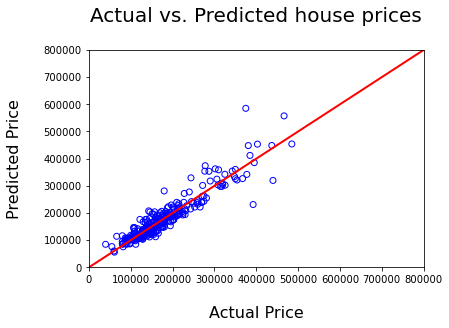

In [38]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [39]:
r2_linear = r2_score(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_linear)
print(rmse_linear)

0.8656194624498658
0.14652482351935944


Ridge Regression

In [40]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

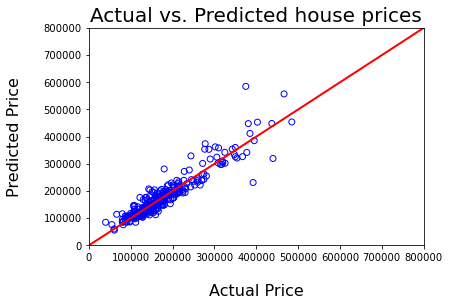

In [41]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [42]:
r2_ridge = r2_score(y_test, y_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_ridge)
print(rmse_ridge)

0.8656626068500908
0.14650129990038516


Lasso regression

In [43]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

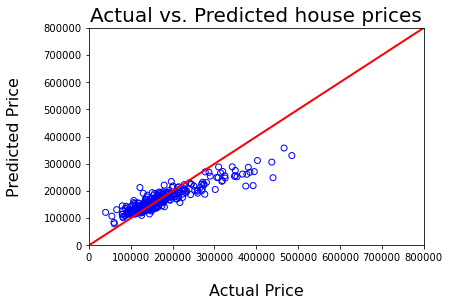

In [44]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [45]:
r2_lasso = r2_score(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_lasso)
print(rmse_lasso)

0.7300645617065324
0.20766962187462165


Elastic Net regression

In [46]:
reg = ElasticNet(alpha=0.001)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

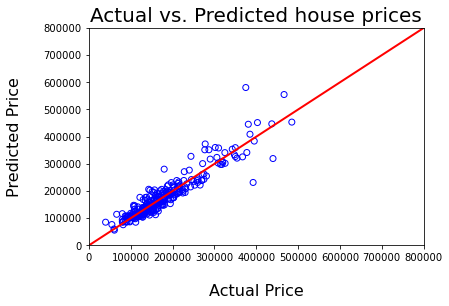

In [47]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [48]:
r2_elas = r2_score(y_test, y_pred)
rmse_elas = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_elas)
print(rmse_elas)

0.8664346560491913
0.14607971516818777


Support Vector Regression

In [49]:
reg = SVR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

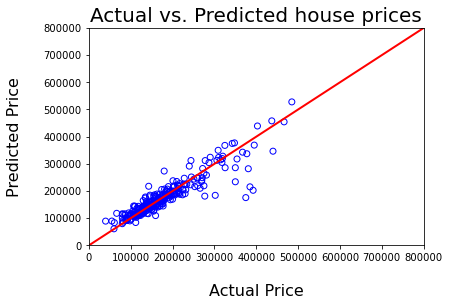

In [50]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [51]:
r2_svr = r2_score(y_test, y_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_svr)
print(rmse_svr)

0.846410866667366
0.156647426654556


Random Forest Regressor

In [52]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

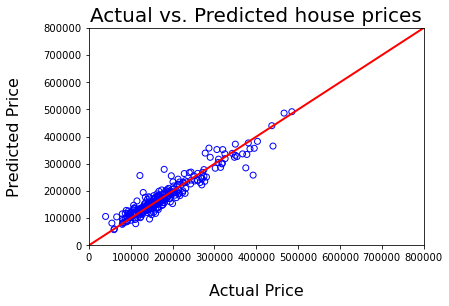

In [53]:
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [54]:
r2_random = r2_score(y_test, y_pred)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_random)
print(rmse_random)

0.8631634699580104
0.1478577340546373


In [55]:
regressor = ['linear','ridge','lasso','elas','svr','random','xgb','lgbm']
print(f"- linear")
print('r2 score:',r2_linear)
print('rmse',rmse_linear,'\n')

print(f"- ridge")
print('r2 score:',r2_ridge)
print('rmse',rmse_ridge,'\n')

print(f"- lasso")
print('r2 score:',r2_lasso)
print('rmse',rmse_lasso,'\n')

print(f"- elas")
print('r2 score:',r2_elas)
print('rmse',rmse_elas,'\n')

print(f"- svr")
print('r2 score:',r2_svr)
print('rmse',rmse_svr,'\n')

print(f"- random")
print('r2 score:',r2_random)
print('rmse',rmse_random,'\n')


- linear
r2 score: 0.8656194624498658
rmse 0.14652482351935944 

- ridge
r2 score: 0.8656626068500908
rmse 0.14650129990038516 

- lasso
r2 score: 0.7300645617065324
rmse 0.20766962187462165 

- elas
r2 score: 0.8664346560491913
rmse 0.14607971516818777 

- svr
r2 score: 0.846410866667366
rmse 0.156647426654556 

- random
r2 score: 0.8631634699580104
rmse 0.1478577340546373 



The end